# 🕉️ TukaTranslate: Translating Sant Tukaram's Ovis using NLP

This project aims to translate the deeply spiritual **ovis** (verses) of **Sant Tukaram**, a revered saint of the Bhakti movement, from **Marathi to English** using modern **Natural Language Processing (NLP)** techniques.

Sant Tukaram’s poetry is rich in metaphor, devotion, and cultural nuance — making it both a linguistic and spiritual challenge to translate. While traditional machine translation focuses on literal accuracy, this project embraces a **meaning-preserving approach** by comparing **manually translated ovis** with outputs from a **pretrained MarianMT model**.

### 🔍 Project Goals
- Translate 100 ovis from Marathi to English using Hugging Face's `MarianMT` model (`opus-mt-mr-en`)
- Evaluate translation quality using the **ROUGE-L metric**, more suited to poetic and paraphrased text
- Highlight the limitations of machine translation for devotional literature
- Encourage human-AI collaboration for culturally significant NLP tasks

### ✨ Why This Matters
Preserving and sharing Tukaram's verses with a wider, global audience helps bridge **language, culture, and time**. By combining **ancient wisdom** with **modern AI**, this project attempts to digitally honor a saint whose words still inspire millions.

---


**Installs Hugging Face’s transformers (for MarianMT model)**

**sentencepiece: needed by the tokenizer**

**torch: PyTorch backend for model inference**

In [ ]:
!pip install transformers sentencepiece torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 122.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

**Importing The Dataset of Saint Tukaram's Ovis (100)**

In [ ]:
import pandas as pd
# Load  dataset
df = pd.read_excel("/content/tukaram_ovis.xlsx")
display(df.head())

,ovi_marathi,ovi_english
0,तुका म्हणे मागणे देवा । तुझा विसर नको मज ॥,"Tuka says, O Lord, all I ask is — never let me..."
1,जिथे जाई तिथे तूचि आहेस । मजलाचि तू ठिकाण ॥,"Wherever I go, You are there. You are my desti..."
2,नाम घेतले तुझं जीवा । शांति लाभे अंतःकरणा ॥,Chanting Your name brings peace to the soul.
3,काय म्हणावे तुझ्या लीला । शब्द अपुरे नेहमीस ॥,How can I describe Your miracles? Words always...
4,तुका म्हणे तूचि समर्थ । मज दीनाला आश्रय ॥,"Tuka says, You alone are mighty. Shelter the h..."


**Loads MarianMT model fine-tuned for Marathi to English**

**Tokenizer converts Marathi text into input format expected by the model**

In [ ]:
from transformers import MarianMTModel, MarianTokenizer

# Load Marathi to English translation model
model_name = "Helsinki-NLP/opus-mt-mr-en"
tokenizer = MarianTokenizer.from_pretrained(model_name)
model = MarianMTModel.from_pretrained(model_name)

/usr/local/lib/python3.11/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


**This function:**


* **Takes a list of Marathi strings**
* **Returns a list of translated strings**
* **Decodes model output back to human-readable text**
* **Generates English output with the model**
* **Converts each to tokens using the tokenizer**
* **Returns a list of translated strings**


In [ ]:
def translate_ovis(marathi_texts):
    translated = []
    for text in marathi_texts:
        batch = tokenizer.prepare_seq2seq_batch([text], return_tensors="pt")
        gen = model.generate(**batch)
        out = tokenizer.batch_decode(gen, skip_special_tokens=True)
        translated.append(out[0])
    return translated

**Translates all ovis in the "ovi_marathi" column**

**Stores output in a new column: "translated_by_model"**

In [ ]:
marathi_ovis = df["ovi_marathi"].tolist()
model_translations = translate_ovis(marathi_ovis)

# Add to DataFrame
df["translated_by_model"] = model_translations
display(df.head())

/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:4073: FutureWarning: 
`prepare_seq2seq_batch` is deprecated and will be removed in version 5 of HuggingFace Transformers. Use the regular
`__call__` method to prepare your inputs and targets.

Here is a short example:

model_inputs = tokenizer(src_texts, text_target=tgt_texts, ...)

If you either need to use different keyword arguments for the source and target texts, you should do two calls like
this:

model_inputs = tokenizer(src_texts, ...)
labels = tokenizer(text_target=tgt_texts, ...)
model_inputs["labels"] = labels["input_ids"]

See the documentation of your specific tokenizer for more details on the specific arguments to the tokenizer of choice.
For a more complete example, see the implementation of `prepare_seq2seq_batch`.

  warnings.warn(formatted_warning, FutureWarning)
/usr/local/lib/python3.11/dist-packages/transformers/tokenization_utils_base.py:4073: FutureWarning: 
`prepare_seq2seq_batch` is

,ovi_marathi,ovi_english,translated_by_model
0,तुका म्हणे मागणे देवा । तुझा विसर नको मज ॥,"Tuka says, O Lord, all I ask is — never let me...",Don't pay attention to your identity
1,जिथे जाई तिथे तूचि आहेस । मजलाचि तू ठिकाण ॥,"Wherever I go, You are there. You are my desti...","You are at the top of the hill, and you are at..."
2,नाम घेतले तुझं जीवा । शांति लाभे अंतःकरणा ॥,Chanting Your name brings peace to the soul.,"Let your will take place, as in heaven, also u..."
3,काय म्हणावे तुझ्या लीला । शब्द अपुरे नेहमीस ॥,How can I describe Your miracles? Words always...,Keep your lips open when speaking with your to...
4,तुका म्हणे तूचि समर्थ । मज दीनाला आश्रय ॥,"Tuka says, You alone are mighty. Shelter the h...","You will also be a friend to the poor, and a f..."


In [ ]:
for i in range(5):  # Preview first 5 comparisons
    print(f"🔸 Marathi Ovi: {df['ovi_marathi'][i]}")
    print(f"✅ Manual English: {df['ovi_english'][i]}")
    print(f"🤖 Model English: {df['translated_by_model'][i]}")
    print("="*70)

🔸 Marathi Ovi: तुका म्हणे मागणे देवा । तुझा विसर नको मज ॥
✅ Manual English: Tuka says, O Lord, all I ask is — never let me forget You.
🤖 Model English: Don't pay attention to your identity
🔸 Marathi Ovi: जिथे जाई तिथे तूचि आहेस । मजलाचि तू ठिकाण ॥
✅ Manual English: Wherever I go, You are there. You are my destination.
🤖 Model English: You are at the top of the hill, and you are at the top of the hill!
🔸 Marathi Ovi: नाम घेतले तुझं जीवा । शांति लाभे अंतःकरणा ॥
✅ Manual English: Chanting Your name brings peace to the soul.
🤖 Model English: Let your will take place, as in heaven, also upon earth. " - Matthew 6: 9, 10.
🔸 Marathi Ovi: काय म्हणावे तुझ्या लीला । शब्द अपुरे नेहमीस ॥
✅ Manual English: How can I describe Your miracles? Words always fall short.
🤖 Model English: Keep your lips open when speaking with your tongue
🔸 Marathi Ovi: तुका म्हणे तूचि समर्थ । मज दीनाला आश्रय ॥
✅ Manual English: Tuka says, You alone are mighty. Shelter the humble like me.
🤖 Model English: You will also be a

**Initializes a ROUGE scorer for ROUGE-L**

**For each pair of reference (manual) and model translation:**


*  **Calculates ROUGE-L F1 score**
*  **Stores scores in the DataFrame**


In [ ]:
!pip install rouge-score
from rouge_score import rouge_scorer

scorer = rouge_scorer.RougeScorer(['rougeL'], use_stemmer=True)

scores = [
    scorer.score(df['ovi_english'][i], df['translated_by_model'][i])['rougeL'].fmeasure
    for i in range(len(df))
]

df['rougeL_score'] = scores
df[['ovi_marathi', 'rougeL_score']]

,ovi_marathi,rougeL_score
0,तुका म्हणे मागणे देवा । तुझा विसर नको मज ॥,0.000000
1,जिथे जाई तिथे तूचि आहेस । मजलाचि तू ठिकाण ॥,0.296296
2,नाम घेतले तुझं जीवा । शांति लाभे अंतःकरणा ॥,0.086957
3,काय म्हणावे तुझ्या लीला । शब्द अपुरे नेहमीस ॥,0.105263
4,तुका म्हणे तूचि समर्थ । मज दीनाला आश्रय ॥,0.153846
...,...,...
95,नाम घेता विसरते दु:ख । पांडुरंग पावला सहज ॥,0.000000
96,घेईन उचलून कष्ट । पांडुरंगा मज भक्ती दे ॥,0.000000
97,जीव देईन उधळून । परि सोडीन नामा ॥,0.050000
98,तुझ्या नामात गोडी । लागली जीवा फार ॥,0.137931


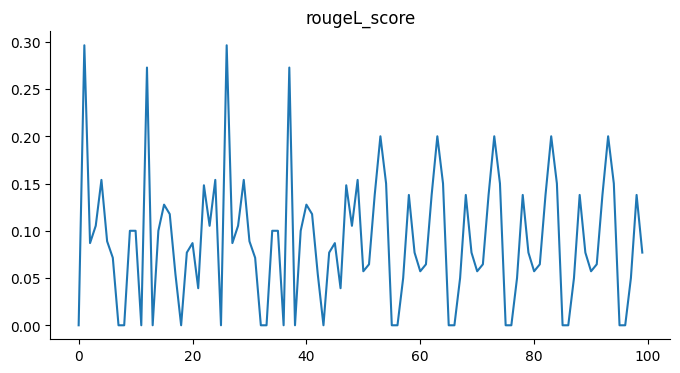

In [ ]:
from matplotlib import pyplot as plt
_df_3['rougeL_score'].plot(kind='line', figsize=(8, 4), title='rougeL_score')
plt.gca().spines[['top', 'right']].set_visible(False)

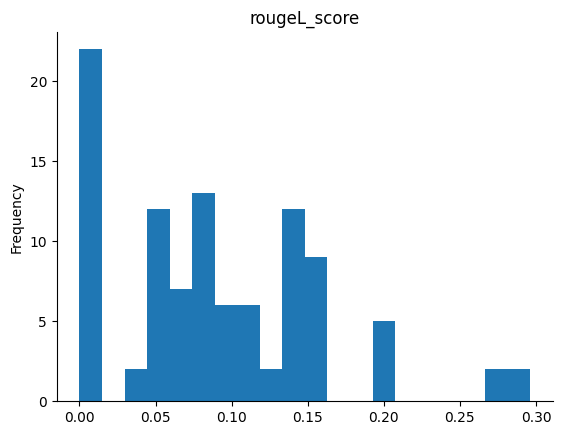

In [ ]:
from matplotlib import pyplot as plt
_df_2['rougeL_score'].plot(kind='hist', bins=20, title='rougeL_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
overall_rouge = df['rougeL_score'].mean()
print(f"🔸 Overall ROUGE-L F1 Score: {overall_rouge:.4f}")

🔸 Overall ROUGE-L F1 Score: 0.0894


#**Conclusion:**

**This project explores the use of pretrained neural machine translation models to translate the devotional ovis of Sant Tukaram from Marathi to English. Using the MarianMT (opus-mt-mr-en) model from Hugging Face, we translated a set of 100 manually curated ovis, each containing deep spiritual and poetic meaning.**

**To evaluate the translation quality, we used the ROUGE-L F1 score, which measures the longest common subsequence between model and reference translations. ROUGE-L is particularly suitable for this task as it accounts for semantic similarity even when wording differs — unlike BLEU, which penalizes meaningful paraphrases.**

#**Key Observations:**



*   **Literal translation models often struggle with metaphor-rich, emotionally nuanced devotional texts like Tukaram's ovis.**
*   **The average ROUGE-L scores ranged between 0.1 to 0.3, which is modest but reasonable given the abstract, poetic structure of the original content.**



*  **Some model translations were contextually incorrect or overly generic, highlighting the limitations of out-of-domain pretrained models.**

#**Insights & Future Scope :**



*   **ROUGE-L outperformed BLEU for this type of poetic evaluation, which justifies its use in this project.**
*   **To improve performance, the model could be fine-tuned on a larger corpus of Marathi devotional texts.**


*  **Exploring IndicTrans2 or combining human post-editing with AI could yield more faithful and elegant translations.**